In [1]:
# From http://icc.dur.ac.uk/Eagle/Database/GSMF.py

In [2]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Array of chosen simulations. Entries refer to the simulation name and comoving box length.
mySims = np.array([('RefL0100N1504', 100.), ('AGNdT9L0050N0752', 50.), ('RecalL0025N0752', 25.)])

In [4]:
# This uses the eagleSqlTools module to connect to the database with your username and password.
# If the password is not given, the module will prompt for it.
con = sql.connect("nkl161", password="FCGxrt20")

RefL0100N1504
AGNdT9L0050N0752
RecalL0025N0752


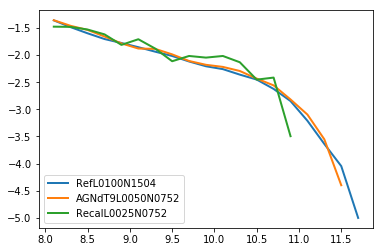

In [12]:
for sim_name, sim_size in mySims:

    print(sim_name)
    
    # Construct and execute query for each simulation. This query returns the number of galaxies 
    # for a given 30 pkpc aperture stellar mass bin (centered with 0.2 dex width). 
    myQuery = """
        SELECT 
            0.1+floor(log10(AP.Mass_Star)/0.2)*0.2 as mass, 
            count(*) as num 
        FROM 
            %s_SubHalo as SH, 
            %s_Aperture as AP 
        WHERE 
            SH.GalaxyID = AP.GalaxyID and 
            AP.ApertureSize =  30 and 
            AP.Mass_Star > 1e8 and 
            SH.SnapNum = 27 
            GROUP BY 
            0.1+floor(log10(AP.Mass_Star)/0.2)*0.2 
            ORDER BY 
            mass"""%(sim_name, sim_name)
    
    # Execute query.
    # Outputs dictionary of arrays
    myData = sql.execute_query(con, myQuery)

    # Normalize by volume and bin width.
    hist = myData['num'][:] / float(sim_size)**3.
    hist = hist / 0.2
    
    plt.plot(myData['mass'], np.log10(hist), label=sim_name, linewidth=2)
    plt.legend()
    

In [ ]:
# Label plot.
plt.xlabel(r'log$_{10}$ M$_{*}$ [M$_{\odot}$]', fontsize=20)
plt.ylabel(r'log$_{10}$ dn/dlog$_{10}$(M$_{*}$) [cMpc$^{-3}$]', fontsize=20)
plt.tight_layout()
plt.legend()

plt.savefig('GSMF.png')
plt.close()